No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


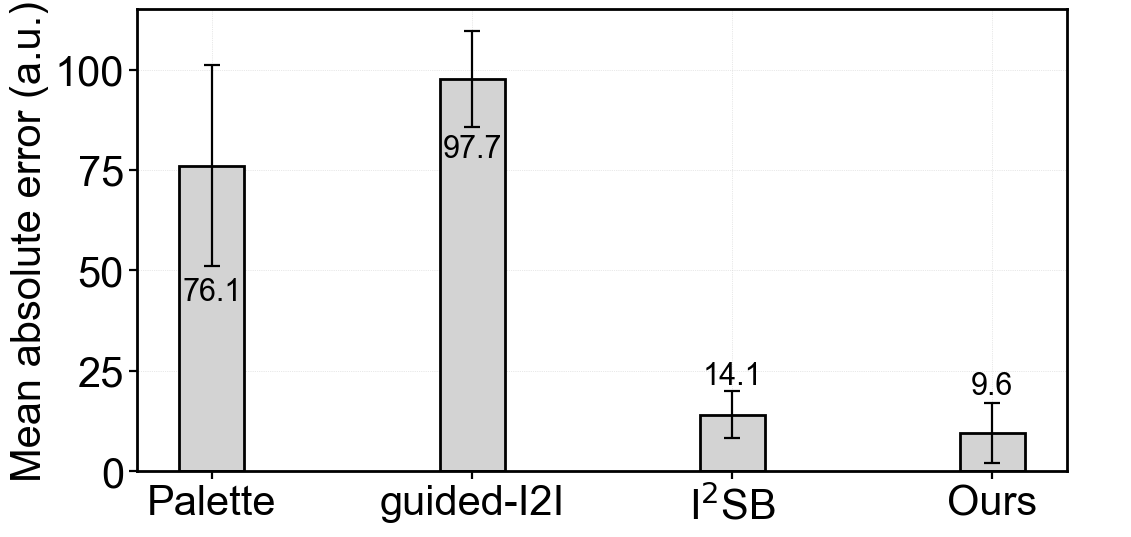

In [35]:
import os
import numpy as np
from matplotlib import pyplot as plt

save_dir = './visualize_counting'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

file_name = 'MAE'
data = {
    'Palette': [76.10572916666666,25.01758486633927],
    'guided-I2I': [97.65729166666667,11.86050727810072],
    'I$^{2}$SB': [14.0796875,5.849565457600397],
    'Ours': [9.614062500000001,7.487409272066131],
}
# settings
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30
linewidth = 2
ticklength = 6
jittersize = 8
width=12
margin=0
bar_margin_width=-width
xlabelsize=30
ylabelsize=30
textsize=22
ylabel = 'Mean absolute error (a.u.)'

fig = plt.figure(figsize=[12,6])
ax = plt.gca()

errobar_set = dict(lw=linewidth*0.8,capthick=linewidth*0.8,capsize=linewidth*3)

# bar
select_column_list = list(data.keys())
num_sample = len(select_column_list)
block = width * len(select_column_list) + margin ## 1尺度あたりのデータを並べるのに必要な幅。
ind = np.arange(len(select_column_list)) * block ## 棒グラフ（長方形）の左下の位置の基準にするポイント
x_postion = ind + (width+bar_margin_width)
#x_postion = list(range(len(select_column_list)))
mean_val = [data[key][0] for key in select_column_list]
std_val = [data[key][1] for key in select_column_list]

ax.bar(x_postion, mean_val, yerr=std_val, error_kw=errobar_set,width=width,
    color='lightgray',edgecolor="k",linewidth=linewidth,zorder=1,alpha=1.0)#0.8

count = 0
y_pos = [-35,-21,6,8]
for x, y in zip(x_postion, mean_val):
    plt.text(x, y+y_pos[count], "{:.1f}".format(y), ha='center', va='bottom', size=textsize)
    count += 1
# ax.bar(x_postion, list(df_each.mean()), width=width,
#     color=colors[group_name],edgecolor="k",linewidth=linewidth,zorder=1,alpha=1.0, label=group_name)#0.8
# ax.errorbar(x_postion, list(df_each.mean()),yerr=yerr, lolims=True,ecolor='k',markeredgecolor = "black", fmt='',
#             elinewidth=linewidth*0.5,capthick=linewidth*0.5,capsize=linewidth)
# custom jitter

xlabels = select_column_list
xlocs = ind + (width+bar_margin_width) * (num_sample-1) / 2.
plt.xticks(xlocs, xlabels)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#plt.xlim(-width-margin, ind[-1]+width*num_sample+margin)
ax.tick_params(axis='x', labelsize=xlabelsize)
ax.set_ylabel(ylabel, fontsize=ylabelsize)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.spines["right"].set_linewidth(linewidth)
ax.spines["top"].set_linewidth(linewidth)
ax.spines["left"].set_linewidth(linewidth)
ax.spines["bottom"].set_linewidth(linewidth)
plt.tick_params(width=linewidth*0.8, length = ticklength)
plt.legend(loc='center left', bbox_to_anchor=(1., .5),frameon=False)
plt.grid(color='lightgrey', linestyle='dotted', linewidth=linewidth/4)
ax.set_axisbelow(True)

plt.savefig(os.path.join(save_dir,file_name+".pdf"),dpi=600,bbox_inches='tight')
plt.savefig(os.path.join(save_dir,file_name+".png"),dpi=600,bbox_inches='tight')
plt.show()
